In [32]:
from IPython.core.display import HTML
def css_styling(filepath):
    styles = open(filepath, 'r').read()
    return HTML(styles)
css_styling('../styles/custom.css')

# Vortex

## What's a vortex?

This question is deeper than you might think! The simple answer is that a vortex is motion in circular streamlines. Imagine streamlines that are concentric circles about a given point—what's confusing is that this does not mean that fluid elements are themselves rotating!

In an irrotational vortex, the tangential velocity is constant along a (circular) streamline and inversely proportional to the radius, while the radial velocity is zero. In polar coordinates:

$$
u_\theta\left(r,\theta\right) = \frac{C}{r},  \qquad  u_r\left(r,\theta\right) = 0
,$$

with $C$ a constant.

The vorticity is zero everywhere, except at the location of the point vortex, where the derivative of $u_\theta$ is infinite.

We introduced the concept of circulation in the first lesson (Source & Sink). Let's use that. Around any circular streamline enclosing the vortex, and using the sign convention that a negative vortex circulates anti-clockwise, we have:

$$\Gamma = -\oint \mathbf{v}\cdot d\vec{l} = -2\pi\oint u_\theta  r d\theta = -2\pi\int_0^{2\pi} C d\theta = -2 \pi C.$$

Thus, the constant in the expression for $u_\theta$ in $(1)$ is equal to $-\Gamma/2\pi$, and we now write:

$$u_\theta\left(r,\theta\right) = -\frac{\Gamma}{2\pi r}$$

We can get the stream function by integrating the velocity components:

$$u_\theta = -\frac{\partial\psi}{\partial r},$$

$$\psi\left(r,\theta\right) = \frac{\Gamma}{2\pi}\ln r$$

In Cartesian coordinates, the stream function is

$$\psi\left(x,y\right) = \frac{\Gamma}{4\pi}\ln\left(x^2+y^2\right)$$

while the velocity components would be:

$$u\left(x,y\right) = \frac{\Gamma}{2\pi}\frac{y}{x^2+y^2}, \qquad v\left(x,y\right) = -\frac{\Gamma}{2\pi}\frac{x}{x^2+y^2},$$

after the general definition

$$\mathbf{u} = \nabla \times \psi \vec{e}_z.$$

This vortex flow is irrotational everywhere, except at the vortex center, where it is infinite ($\sim 1/r$). The strength of the point vortex is equal to the circulation $\Gamma$ around it.

## Let's compute a vortex
The set-up is the same as before: we load our favorite libraries, and we create a grid of points to evaluate the velocity field.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# embed the figures into the notebook
%matplotlib inline

In [3]:
N = 50                                # Number of points in each direction
x_start, x_end = -2.0, 2.0            # x-direction boundaries
y_start, y_end = -1.0, 1.0            # y-direction boundaries
x = np.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = np.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = np.meshgrid(x, y)              # generates a mesh grid

Give your vortex a strength $\Gamma=5$ and place it at the center of your domain:

In [4]:
Gamma = 5.0                      # strength of the vortex
x_vortex, y_vortex = 0.0, 0.0    # location of the vortex

We will define two functions,

* get_velocity_vortex() and
* get_stream_function_vortex(),

to compute the velocity components and the stream function on our Cartesian grid, given the strength and the location of the vortex. Then, we will use our custom functions to evaluate everything on the grid points. Let's write those functions first.

In [8]:
def get_velocity_vortex(Gamma, xv, yv, X, Y):
    """
    Returns the velocity field generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = +Gamma/(2*np.pi)*(Y - yv)/((X - xv)**2 + (Y - yv)**2)
    v = -Gamma/(2*np.pi)*(X - xv)/((X - xv)**2 + (Y - yv)**2)
    
    return u, v

In [9]:
def get_streamfunction_vortex(Gamma, xv, yv, X, Y):
    """
    Returns the stream-function generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = Gamma/(4*np.pi)*np.log((X - xv)**2 + (Y - yv)**2)
    
    return psi

An now, call the functions with the vortex strength and position, plus the coordinates of the evaluation grid, to get the velocity and streamfunction of the vortex

In [13]:
# compute the velocity field on the mesh grid
u_vortex, v_vortex = get_velocity_vortex(Gamma, x_vortex, y_vortex, X, Y)

# compute the stream-function on the mesh grid
psi_vortex = get_streamfunction_vortex(Gamma, x_vortex, y_vortex, X, Y)

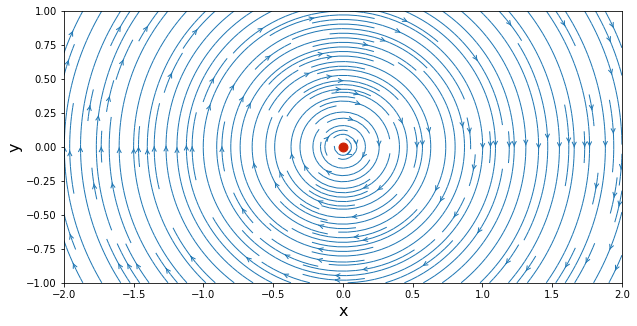

In [22]:
# plot the streamlines
width = 10
height = (y_end - y_start)/(x_end - x_start)*width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_vortex, v_vortex,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');

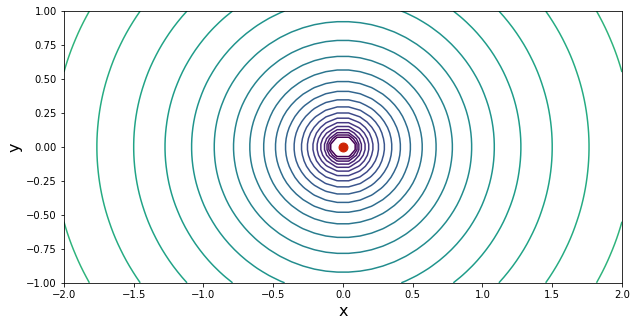

In [21]:
# plot the streamlines
width = 10
height = (y_end - y_start)/(x_end - x_start)*width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.contour(X, Y, psi_vortex, levels=np.linspace(-2, 2, 32))
plt.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');

## Vortex & Sink
For fun, let's use our superposition powers. Add a vortex to a sink, using two new functions to compute the velocity components and the stream function of the sink, and adding to those of a vortex (remember that the sink can be easily replaced by a source by just changing the sign of the strength).

In [27]:
sigma_sink = -1.0            # strength of the sink
x_sink, y_sink = 0.0, 0.0       # location of the sink

In [25]:
def get_velocity_sink(sigma, xs, ys, X, Y):
    """
    Returns the velocity field generated by a sink.
    
    Parameters
    ----------
    strength: float
        Strength of the sink.
    xs: float
        x-coordinate of the sink.
    ys: float
        y-coordinate of the sink.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = sigma/(2*np.pi)*(X - xs)/((X - xs)**2 + (Y - ys)**2)
    v = sigma/(2*np.pi)*(Y - ys)/((X - xs)**2 + (Y - ys)**2)
    
    return u, v

In [26]:
def get_streamfunction_sink(sigma, xs, ys, X, Y):
    """
    Returns the stream-function generated by a sink.
    
    Parameters
    ----------
    strength: float
        Strength of the sink.
    xs: float
        x-coordinate of the sink.
    ys: float
        y-coordinate of the sink.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = sigma/(2*np.pi)*np.arctan2((Y - ys), (X - xs))
    
    return psi

In [28]:
u_sink, v_sink = get_velocity_sink(sigma_sink, x_sink, y_sink, X, Y)
psi_sink = get_streamfunction_sink(sigma_sink, x_sink, y_sink, X, Y)

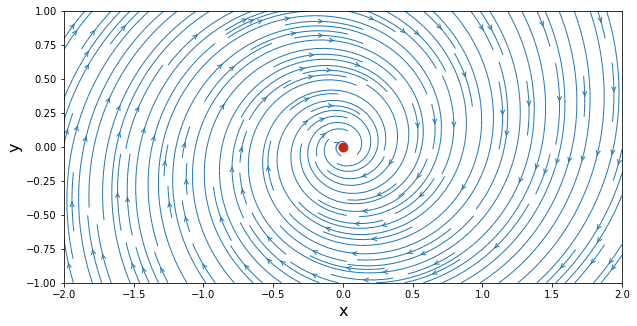

In [30]:
# superposition of the sink and the vortex
u, v = u_sink + u_vortex, v_sink + v_vortex
psi = psi_sink + psi_vortex

# plot the streamlines
width = 10
height = (y_end - y_start)/(x_end - x_start)*width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');

## What's this "irrotational" vortex thing?

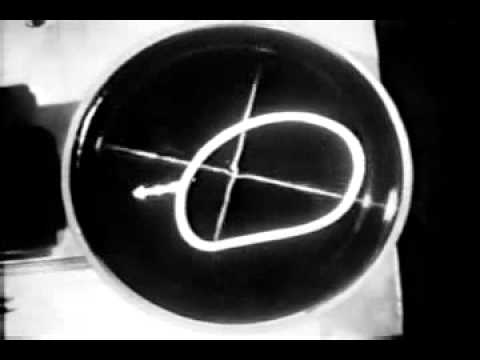

In [31]:
from IPython.display import YouTubeVideo
from datetime import timedelta

start=int(timedelta(hours=0, minutes=4, seconds=25).total_seconds())

YouTubeVideo("loCLkcYEWD4", start=start)